# Discretization of a function of a single variable. Differentiation through finite differences.

## 1 – Code to represent the function and the analytical and numerical derivative.

Consider the function

$$h(x) = \cos\left[\frac{\pi (x-1)}{2}\right] \exp\left[-\left(\frac{x-3}{2.5}\right)^2\right],\tag{1}$$

with $x \in (-4,10) $.

Let us define a sampling of $h$ with 64 intervals, that is, 65 points, and store the
values into double precision arrays called $xx$ and $hh$. Numpy arrays are double precision as 
default. To define $xx$ in Python you can use the commands:

`import numpy as np
nump=65
x0=-4.0 
xf=10.0
xx = np.arange(nump)/(nump-1.0) * (xf-x0) + x0`

Use `matplotlib.pyplot` to visualize hh vs xx. 

Define the variable $nint$ as the number of intervals ($nint= 64$ in the present case)
and $nump$ as the number of points. In IDL, Python and C, those components go
from the $0-$component through the component $nump−1$. Compute the ratio (1) in the [wiki](https://github.com/AST-Course/AST5110/wiki/Discretization) using and filling the function `deriv_dnw` in `nm_lib`. Feel free to use any known library or create your own functions from scratch. 

It will depend on how you created the function that you have $nump$ or $nump−1$ elements. If the former, the last component ($nump-1$) is ill calculated. $hp$ contains a second-order approximation to the derivative of the $hh$ function at the intermediate points $x_{i+1/2}$.

## Tasks:

1. Plot $hh$ versus $xx$ as a solid line with crosses added at each grid point (to visualize the goodness of the discretization) or with `plt.hist` function combined with `plt.plot`. _Make sure the axis pixels are properly located either to the center or half grid shifted_

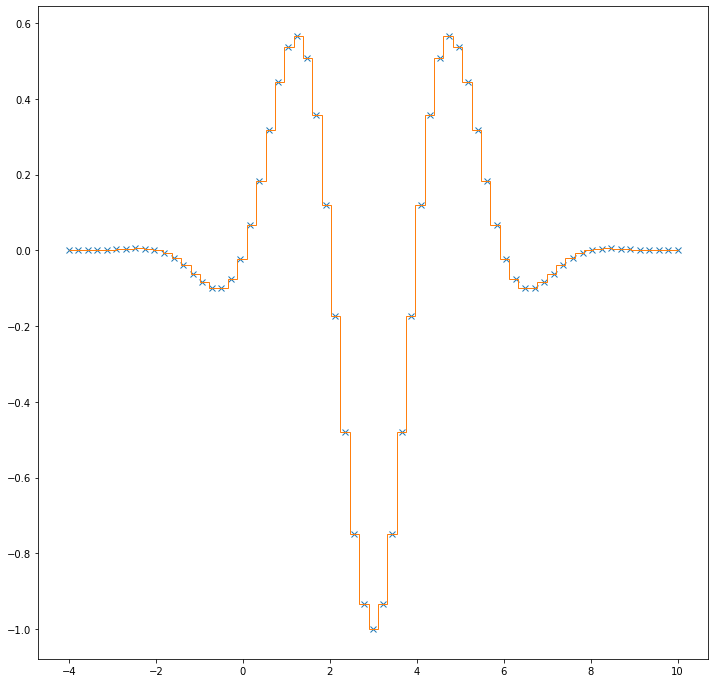

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib


nump = 65
x0 = -4.0
xf = 10.0

xx = np.arange(nump)/(nump - 1.0) * (xf-x0) + x0

def h(x):
    """
    Equation (1) from above

    Parameters
    ----------
    x   :   `array`
            Spatial axis
    
    Returns
    -------
    `array`
        The solution over the spatial axis
    """
    ans = np.cos(np.pi*(x-1)/2)*np.exp(-((x-3)/2.5)**2)
    return ans

hh = h(xx)

plt.figure(figsize=(12, 12))
plt.plot(xx, hh, 'x')
aa = plt.hist(xx, range=(x0, xf), bins=nump, weights=hh, histtype='step')

#### Above we see the function plotted, where $x$ marks the data points, and the histogram overlayed

2. Plot the array containing the numerical derivative, $hp$. Calculate analytically the derivative of the function (1) and represent it in the same figure to ascertain the goodness of the approximation for that number of points. __hint__ _make sure the axis pixels are properly located either to the center or half grid shifted_. 

In [2]:
def dh(xx):
    """
    The analytical derivate of h(x)
    # Hand calculations were wrong
    u = np.cos(np.pi*(xx-1)/2)
    v = np.exp(-((xx-3)/2.5)**2)
    
    du = - np.pi/2 * np.sin(np.pi*(xx - 1)/2)
    dv = - 2*((xx-3)/2.5)*(1/2.5)*np.exp(- ((xx-3)/2.5)**2)
    
    ans = du*v + v*dv

    Parameters
    ----------
    xx  :   `array`
            Spatial axis
    """
    # Wolfram alpha
    ans = np.exp( -0.16 * (-3 + xx)**2) * (1.5708 * np.cos((np.pi*xx) / 2) - (-0.96 + 0.32 * xx) * np.sin((np.pi * xx) / 2))
    return ans

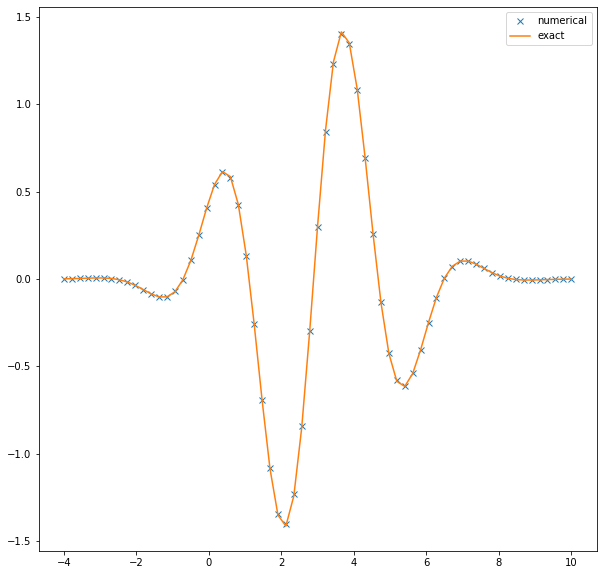

In [3]:
from nm_lib import nm_lib as nm
importlib.reload(nm)

dx = (xx[1] - xx[0])

y = nm.deriv_dnw(xx, h(xx))
y_exact = dh(xx+dx/2)


plt.figure(figsize=(10,10))
plt.plot(xx, y, 'x', label='numerical')
plt.plot(xx, y_exact, label='exact')
plt.legend()

#### Above I plot the exact solution of the derivative against the numerical approximation marked with $x$. To account for the shift, I subtracted $dx/2$ from the analytical solution

<span style="color:green">JMS</span>.

<span style="color:red"> I don't see that you substracted 1/2dx in the analytical solution</span>.

#### Fixed

3. Repeat the foregoing, but now using $nint= 32$ and $nint= 16$ intervals to see how the approximation deteriorates. Thereafter, repeat the same process for 128 and 256 intervals, to see how it improves. Consider to use `plt.semilogy` for the error. 

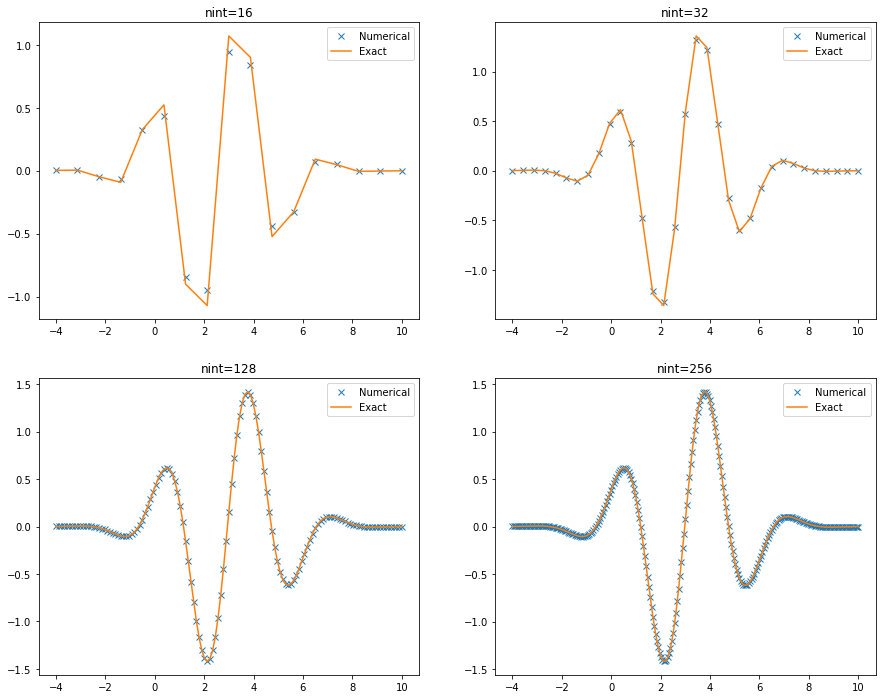

In [4]:
i = 0
j = 0
fig, ax = plt.subplots(2, 2, figsize=(15,12))

for nint in [16, 32, 128, 256]:
    nump = nint + 1
    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    
    dx = xx[1] - xx[0]

    y = nm.deriv_dnw(xx, h(xx))
    y_exact = dh(xx + dx/2)

    ax[i, j].set_title(f'nint={nint}')
    ax[i, j].plot(xx, y, 'x', label='Numerical')
    ax[i, j].plot(xx, y_exact, label='Exact')
    ax[i, j].legend()
    
    j += 1
    if j == 2:
        i += 1
        j = 0


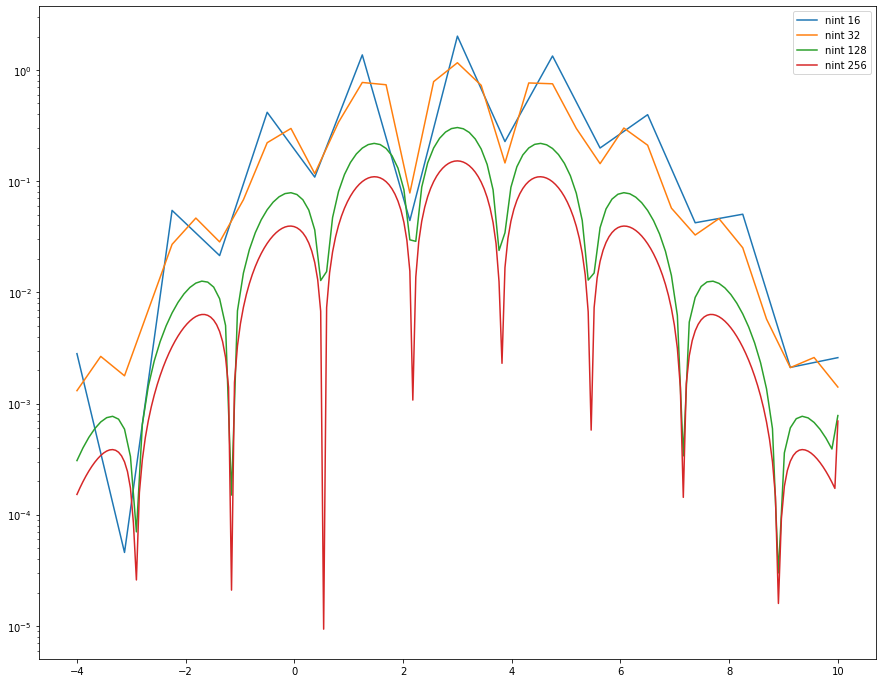

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15,12))
mean = []
nint_list = [16, 32, 128, 256]

for nint in [16, 32, 128, 256]:
    nump = nint + 1
    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    
    dx = xx[1] - xx[0]

    y = nm.deriv_dnw(xx, h(xx))
    y_exact = dh(xx-dx/2)
    diff = np.mean(abs(y - y_exact))
    mean.append(diff)
    ax.semilogy(xx, abs(y-y_exact), label=f'nint {nint}')
    ax.legend()



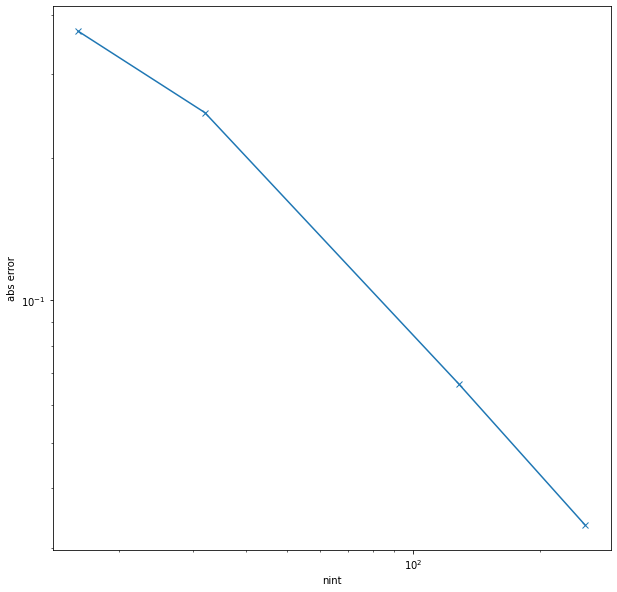

In [6]:
plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")
plt.loglog(nint_list, mean, '-x')

#### In the two above plots we observe first that the absolute error goes down quadraticly. 

<span style="color:green">JMS</span>.

<span style="color:blue">Good! </span>.

<span style="color:orange">To be able that it follows quadratic, nint axis should be in log too </span>.

## 2- Test of the quadratic order of the approximation.

We are going to test if the ratio $(h_{i+1}-h_i)/(x_{i+1}-x_i)$ approaches the analytical value of the derivative. To that end, we will use samplings with, successively, 16, 32, 64, 128, 256, 512 and 1024 intervals (which are successive powers of 2). Calculate the maximum of the absolute value of the error, meaning: the difference between the analytical and the numerical derivatives at the _same points_. Plot a graph of that value versus the size of the interval in each case using a diagram with logarithmic axes. Check if the curve you get corresponds to a quadratic dependence.

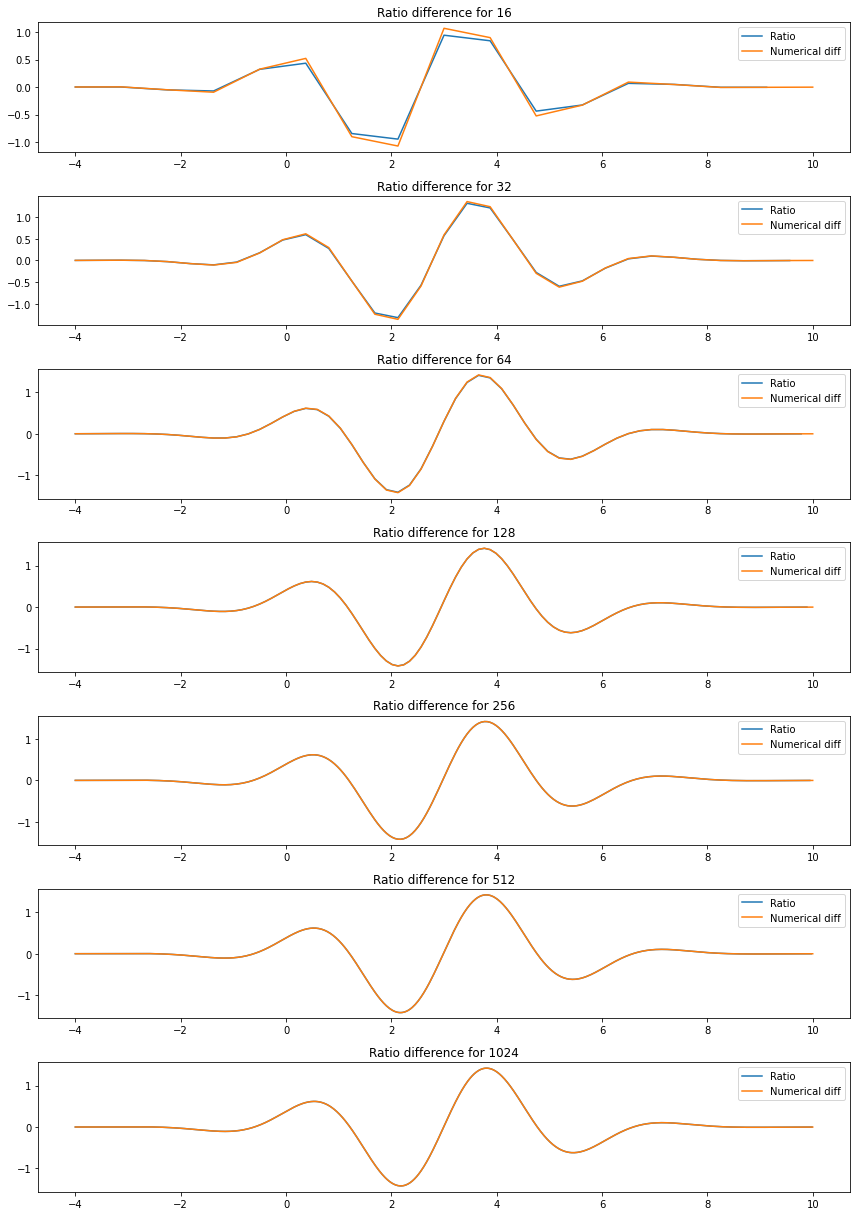

In [7]:

nint = 32
nump = 33

fig, ax = plt.subplots(7, 1, figsize=(12, 17))

l = 0
mean = []
for i in range(4, 11):
    diff = []
    nint = 2**i
    nump = nint + 1

    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    dx = xx[1] - xx[0]
    hh = h(xx)
    dhh = dh(xx + dx/2)
    for j in range(len(xx)-1):
        ans = (hh[j+1] - hh[j])/(xx[j+1] - xx[j])
        diff.append(ans)
    mean.append(np.mean(abs(dhh[:-1] - diff)))
    ax[l].set_title(f'Ratio difference for {nint}')
    ax[l].plot(xx[:-1], diff, label='Ratio')
    ax[l].plot(xx, dhh, label='Numerical diff')
    ax[l].legend()
    
    l += 1
plt.tight_layout()

#### In the above plot we observe that for higher `nint` the approximation gets better and better

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! </span>.

<span style="color:yellow">Could you try to correct on the shift here so the overlap between ratio and numerical diff is the same in x axis? It will make easier to compare. This could be also applied to the previous task</span>.

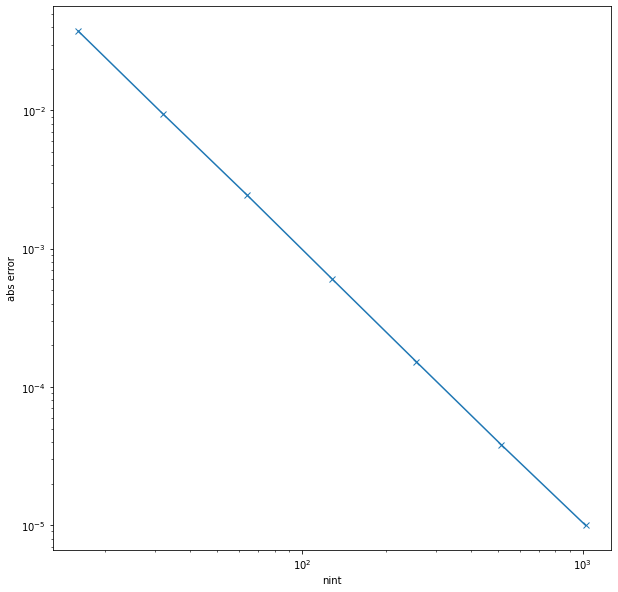

In [8]:
nint_list = [2**i for i in range(4, 11)]
fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")

plt.loglog(nint_list, mean, '-x')

#### Above plot is logarithmic and we see that it goes linearly on that scale

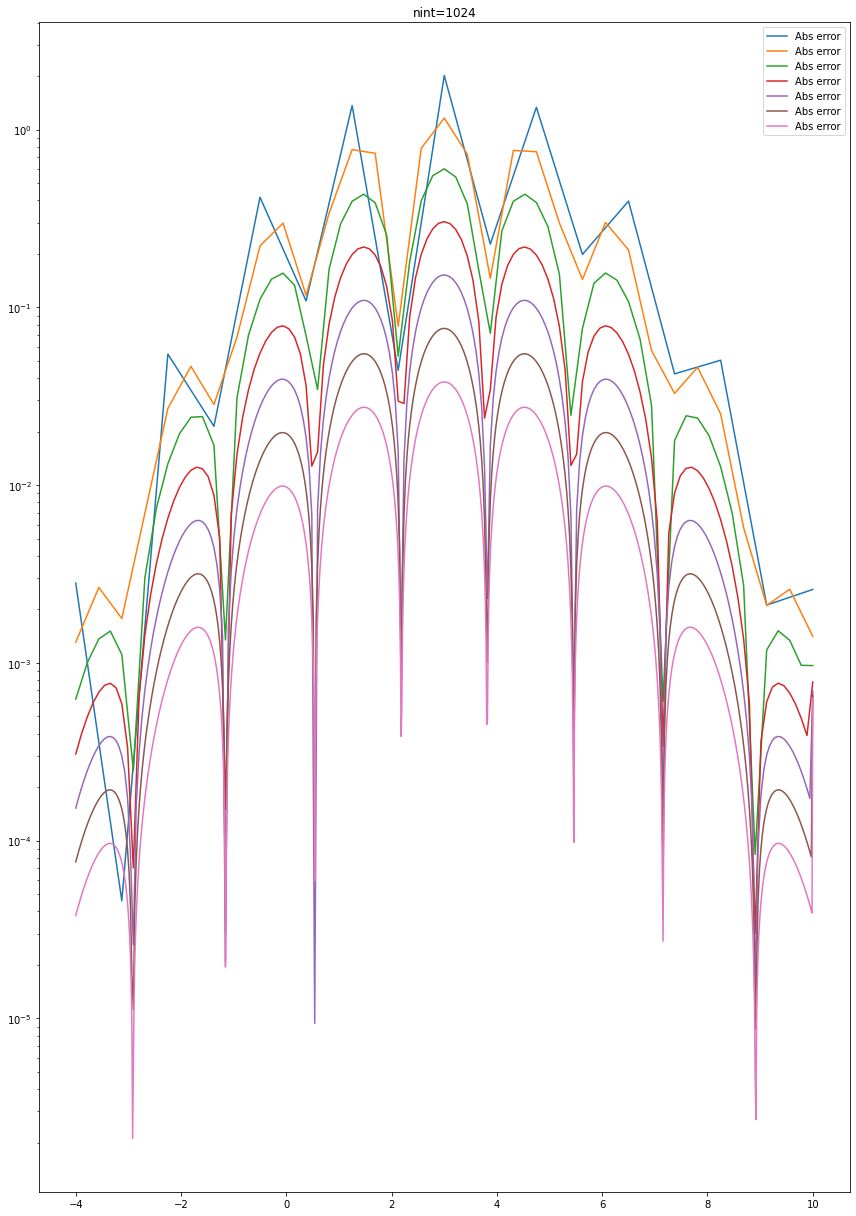

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))
l = 0
mean = []

for i in range(4, 11):
    nint = 2**i
    nump = nint + 1
    xx = np.arange(nump)/(nint) * (xf - x0) + x0
    
    dx = xx[1] - xx[0]

    y = nm.deriv_dnw(xx, h(xx))
    y_exact = dh(xx-dx/2)
    
    mean.append(np.mean(abs(y-y_exact)))

    ax.set_title(f'nint={nint}')
    ax.semilogy(xx, abs(y-y_exact), label='Abs error')
    ax.legend()

plt.tight_layout()

-0.00035880106923317975


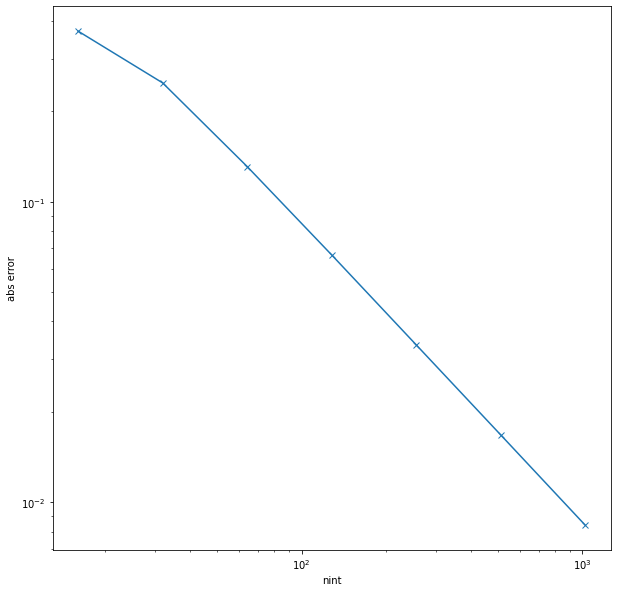

In [15]:
nint_list = [2**i for i in range(4, 11)]

print((mean[-1] - mean[0])/(nint_list[-1] - nint_list[0]))
fig = plt.figure(figsize=(10,10))
plt.ylabel('abs error')
plt.xlabel("nint")

plt.loglog(nint_list, mean, '-x')

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! </span>.

<span style="color:orange">Same as above. Could you also explain in a few sentences the steps you did. How did you do it? </span>.

#### Since the slope is in the loglog it shows that a power relation does exist. Using the log rules one can see that the gradient of the slope corresponds to the power. This was achieved by taking the mean value over all the error for different `nint`

Try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

To test the accuracy of the result of the previous paragraph:

1. extend the test to a larger range of number of intervals (including 2048, 4096, 8192, 16384). Make sure to use double precision variables throughout the program (meaning: all variables except the array indices).

2. then try to fit a straight to the logarithm of the error curves using Python program `numpy.polyfit` and `numpy.poly1d`. From the value of the slope you get from that program, check the accuracy with which you obtain the quadratic dependence.

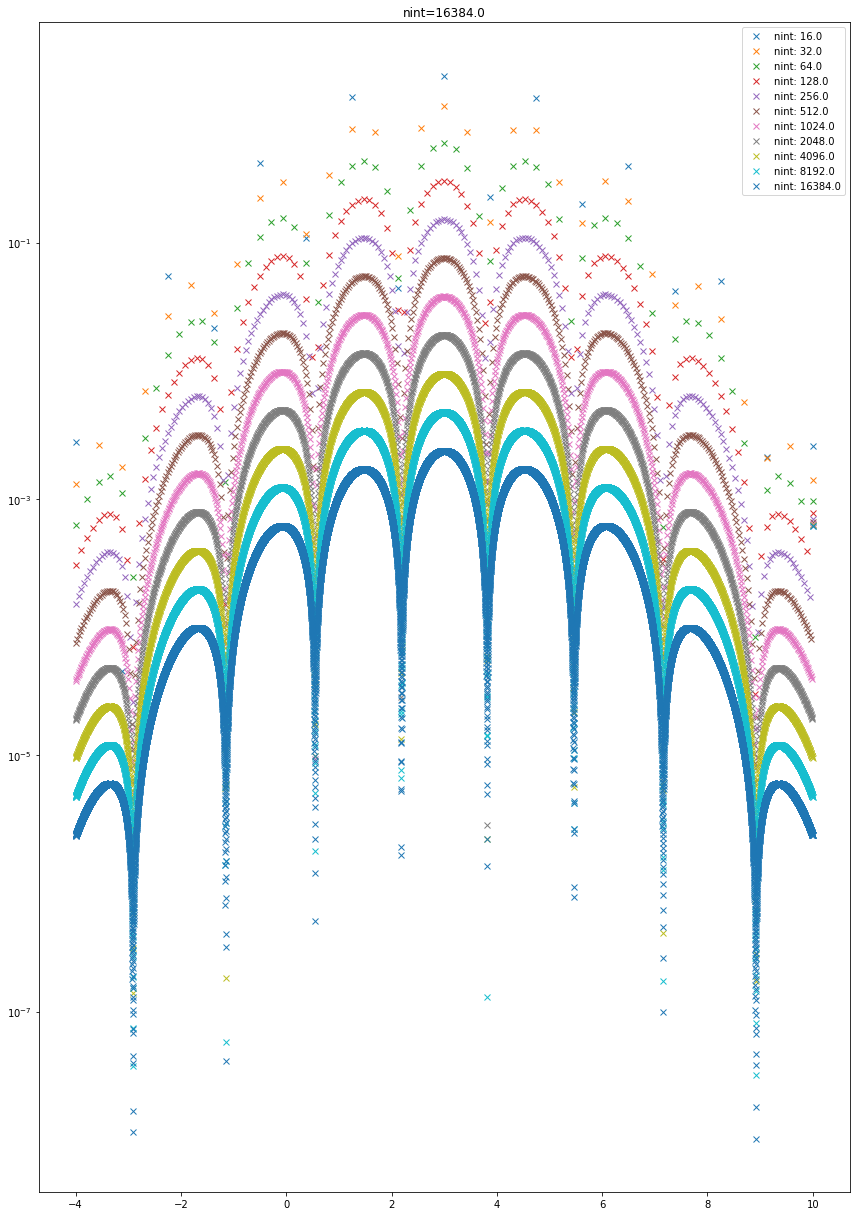

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 17))

abs_err = []
dxs = []
polyfit = []

for i in range(4, 15):
    nint = np.double(2**i)
    nump = np.double(nint + 1)
    xx = np.double(np.arange(nump)/(nint) * (xf - x0) + x0)
    
    dx = np.double(xx[1] - xx[0])

    y = np.double(nm.deriv_dnw(xx, h(xx)))
    y_exact = np.double(dh(xx-dx/2))
    
    diff = np.abs(y-y_exact)
    abs_err.append(np.mean(diff[1:]))
    dxs.append(dx)

    ax.set_title(f'nint={nint}')
    ax.semilogy(xx, diff, 'x', label=f'nint: {nint}')
    ax.legend()
    
plt.tight_layout()

In [12]:
z = np.polyfit(np.log10(dxs[:-3]), np.log10(abs_err[:-3]), deg=1)
p = np.poly1d(z)


11


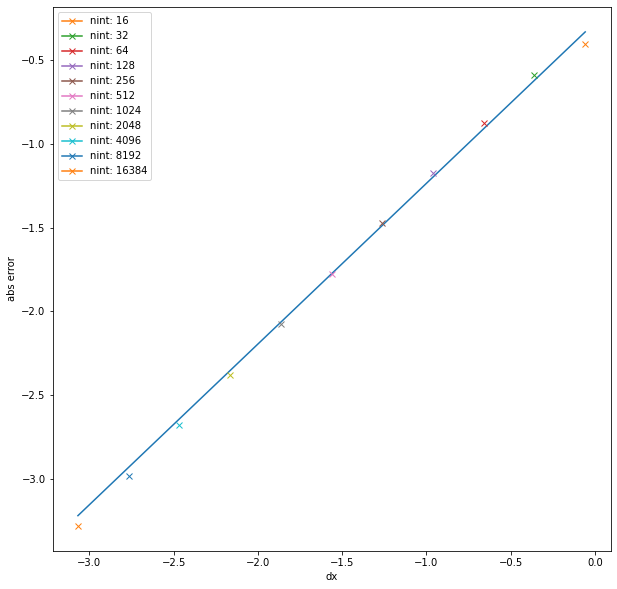

In [13]:
x_new = np.logspace(11, 15, base=10)
print(len(abs_err))
nint_list = [2**i for i in range(4, 15)]
fig = plt.figure(figsize=(10, 10))
plt.ylabel('abs error')
plt.xlabel("dx")
plt.plot(np.log10(dxs), p(np.log10(dxs)))
for i in range(len(abs_err)):
    plt.plot(np.log10(dxs[i]), np.log10(abs_err[i]), '-x', label=f'nint: {nint_list[i]}')
plt.legend()

In [14]:
print(p)

 
0.9579 x - 0.2785


#### Where we see that the coefficient to $x$ is close to 2 which is the quadratic dependencies

<span style="color:green">JMS</span>.

<span style="color:blue">GREAT JOB! </span>.

<span style="color:orange">Could you also explain in a few sentences the steps you did. How did you do it? Also, explain a bit more the results.</span>.

#### Same as before, but the plot is not in loglog, since I did the polyfit in the logarithmic scale. Meaning that the axis are the powers of 10

#### 

## 3- Analytical proof of the order of convergence of the approximation for the derivative (optional)

Consider the sampling used in exercise this, assuming that the spacing between grid points is uniform, i.e., $(\Delta x)_i = \Delta x$. Write a formal Taylor expansion as follows:


$$f(x_{i+1}) = f(x_{i+1/2}) + f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{2}$$

$$f(x_{i}) = f(x_{i+1/2}) - f'(x_{i+1/2})\frac{\Delta x}{2} + ...  \tag{3}$$

including terms up to order $(\Delta x)^3$. Eliminating terms combining those two expressions, conclude that, as said in the previous exercise sheet, the finite-difference approximation to the derivative at the midpoints $x_{i+1/2}$ carried out there is of 2nd order.